In [1]:
! pip install rake_nltk

import pandas as pd
import numpy as np
from rake_nltk import Rake #import rake algorithm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from ast import literal_eval

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=0417236b57fb9a0e3faf14172fd52736ae9c5739e27ca28caf928e73418f3a31
  Stored in directory: c:\users\9mzx8\appdata\local\pip\cache\wheels\f8\95\fd\23f0be53d1c5d234377f3f85ce063be7d894f0ecdb568389df
Successfully built rake-nltk


You should consider upgrading via the 'C:\Users\9mzx8\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Join datasets
credits.columns = ['id', 'title', 'cast', 'crew']

alldata = movies.merge(credits, on = 'id') #merge方法(pd data, by which columns) #合併成為一個新檔案alldata
alldata.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Json格式欄位處理
--
Json格式欄位處理，找出關鍵字、風格、演員、導演，這部分較瑣碎。

In [5]:
# Parse stringed list features into python objects
features = ['keywords', 'genres', 'cast', 'crew']

for i in features:  #for迴圈後面接的要是一個可以遍歷的數列，或是可以iterative的物件。
    #(故這邊i會分別為：'keywords', 'genres', 'cast', 'crew')
    #用apply方法apply(literal_eval)，使上述四種feature依序被取代。
    df[i] = alldata[i].apply(literal_eval) #literal_eval 會判斷需要處理的內容處理後是不是合法的python型別，如果是則處理，否則不處理

In [6]:
#看一下資料的狀況
df

,id,original_title,genres,keywords,overview,original_language,cast,director,crew
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di...",en,"[{'cast_id': 242, 'character': 'Jake Sully', '...",jamescameron,"[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha...",en,"[{'cast_id': 4, 'character': 'Captain Jack Spa...",goreverbinski,"[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",A cryptic message from Bond’s past sends him o...,en,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",sammendes,"[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Following the death of District Attorney Harve...,en,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...",christophernolan,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...","John Carter is a war-weary, former military ca...",en,"[{'cast_id': 5, 'character': 'John Carter', 'c...",andrewstanton,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 5616, 'name': 'united states–mexico ba...",El Mariachi just wants to play his guitar and ...,es,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...",robertrodriguez,"[{'credit_id': '52fe44eec3a36847f80b280b', 'de..."
4799,72766,Newlyweds,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",[],A newlywed couple's honeymoon is upended by th...,en,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...",edwardburns,"[{'credit_id': '52fe487dc3a368484e0fb013', 'de..."
4800,231617,"Signed, Sealed, Delivered","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...","""Signed, Sealed, Delivered"" introduces a dedic...",en,"[{'cast_id': 8, 'character': 'Oliver O’Toole',...",scottsmith,"[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de..."
4801,126186,Shanghai Calling,[],[],When ambitious New York attorney Sam is sent t...,en,"[{'cast_id': 3, 'character': 'Sam', 'credit_id...",danielhsia,"[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de..."


手刻更新資料(分解呈現)
--


In [7]:
x = alldata[['id', 'original_title', 'genres', 'keywords', 'overview', 'original_language', 'cast', 'crew']]
features = ['keywords', 'genres', 'cast', 'crew']

for i in features:  
    #for迴圈後面接的要是一個可以遍歷的數列，或是可以iterative的物件。
    #(故這邊i會分別為：'keywords', 'genres', 'cast', 'crew')
    #用apply方法apply(函數名稱)，使上述四種feature依序被取代。
 
    x[i] = alldata[i].apply(literal_eval)

x['genres'] = x["genres"]

In [8]:
x['genres'][0] #我們觀看原始資料的"流派這一格"，發現一列中可能有需許流派。

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [9]:
l1 = []
for i in range(len(x['genres'])):
    l1.append(x['genres'][i])
l1


[[{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 878, 'name': 'Science Fiction'}],
 [{'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 28, 'name': 'Action'}],
 [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 80, 'name': 'Crime'}],
 [{'id': 28, 'name': 'Action'},
  {'id': 80, 'name': 'Crime'},
  {'id': 18, 'name': 'Drama'},
  {'id': 53, 'name': 'Thriller'}],
 [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 878, 'name': 'Science Fiction'}],
 [{'id': 14, 'name': 'Fantasy'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 [{'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}],
 [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 878, 'name': 'Science Fiction'}],
 [{'id': 12, 'name': 'Adventure'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 10751, 'name': 'Family'}],
 [{'id': 28, 'name': 'Action'},
  

In [10]:
l2 = []
for i in range(len(x['genres'])):
    l2.append(len(x['genres'][i]))
l2


[4,
 3,
 3,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 1,
 5,
 4,
 3,
 3,
 2,
 4,
 3,
 3,
 2,
 3,
 6,
 3,
 2,
 4,
 3,
 2,
 4,
 2,
 3,
 1,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 5,
 3,
 2,
 2,
 4,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 4,
 3,
 5,
 4,
 5,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 5,
 5,
 3,
 3,
 5,
 3,
 3,
 5,
 4,
 1,
 5,
 3,
 4,
 3,
 3,
 3,
 6,
 4,
 3,
 2,
 5,
 4,
 4,
 3,
 2,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 2,
 3,
 4,
 5,
 1,
 2,
 3,
 3,
 4,
 2,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 4,
 3,
 5,
 3,
 3,
 1,
 4,
 3,
 3,
 2,
 6,
 1,
 1,
 3,
 5,
 3,
 4,
 5,
 6,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 4,
 2,
 5,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 5,
 5,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 4,
 5,
 3,
 4,
 3,
 3,
 2,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 3,
 1,
 4,
 3,
 4,
 2,
 3,
 3,
 4,
 4,
 2,
 2,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 3,
 5,
 4,
 4,
 3,
 5,
 3,
 3,
 4,
 3,
 5,
 3,
 3,
 4,
 2,
 4,
 3,


In [11]:
len(l1)

4803

In [12]:
print(literal_eval("(1,2,3)")) #還原字串的原本形式
print(literal_eval("[8,7,9]"))
print(literal_eval("{ 'spiker' : 879 }"))

(1, 2, 3)
[8, 7, 9]
{'spiker': 879}


In [13]:
x['genres']

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, Length: 4803, dtype: object

In [14]:
def list_genres(x):
    l = [d['name'] for d in x] #先將資料load進來成為一個 2維的串列(列為總個數，行為每筆資料的feature。
    return(l)
x['genres'] = x['genres'].apply(list_genres) # 針對每一格做改變，應用apply(我們上密字定義的函數list_genres)


In [15]:
x['genres'] 

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [27]:
import warnings
warnings.filterwarnings('ignore')


# Trim dataset to include relevant features
# 取id, original_title,　genres(流派), keywords, overview, original_language
df = alldata[['id', 'original_title', 'genres', 'keywords', 'overview', 'original_language', 'cast', 'crew']]

#現在我們先從alldata中取出我們所需要的column

# Parse stringed list features into python objects
features = ['keywords', 'genres', 'cast', 'crew']

for i in features:  
    #for迴圈後面接的要是一個可以遍歷的數列，或是可以iterative的物件。
    #(故這邊i會分別為：'keywords', 'genres', 'cast', 'crew')
    #用apply方法apply(函數名稱)，使上述四種feature依序被取代。
    
    df[i] = alldata[i].apply(literal_eval) #literal_eval 會判斷需要處理的內容處理後是不是合法的python型別，如果是則處理，否則不處理
    
    #literal_eval 這個函式非常的重要，幫助我們從原本的str 型態，轉化成為tuple, 或是 dictionary, 或是 list格式，這樣才方便後續操作。
    
# Extract list of genres
def list_genres(x):
    l = [d['name'] for d in x] #先將資料load進來成為一個 2維的串列(列為總個數，行為每筆資料的feature。
    return(l)
df['genres'] = df['genres'].apply(list_genres)

#上面使用自訂意涵式的方式來處理，這樣是方便使用者或其他人以後做修改，但若較沒經驗(例如我)，則可以使用(上面的方法)。

# Extract top 3 cast members
def list_cast(x):
    l = [d['name'] for d in x]
    if len(l) > 3:
        l = l[:3]
    return(l)
df['cast'] = df['cast'].apply(list_cast)

# Extract top 5 keywords
def list_keywords(x):
    l = [d['name'] for d in x]
    if len(l) > 5:
        l = l[:5]
    return(l)
df['keywords'] = df['keywords'].apply(list_keywords)

# Extract director
# 我們觀看到 director 包含在 crew 裡面
def get_director(x):
    for i in x:  
        if i['job'] == 'Director':
            return i['name']
    return np.nan
df['director'] = df['crew'].apply(get_director)

# Drop the now unnecessary crew feature 丟掉組員

df = df.drop('crew', axis = 1)

# Clean features of spaces and lowercase all to ensure uniques
def clean_feat(x):
    if isinstance(x, list):
        return [i.lower().replace(" ","") for i in x]
    else:
        if isinstance(x, str):
            return x.lower().replace(" ", "")
        else:
            return ''

features = ['keywords', 'genres', 'cast', 'director']
for i in features:
    df[i] = df[i].apply(clean_feat)

In [28]:
df["genres"]

0       [action, adventure, fantasy, sciencefiction]
1                       [adventure, fantasy, action]
2                         [action, adventure, crime]
3                   [action, crime, drama, thriller]
4                [action, adventure, sciencefiction]
                            ...                     
4798                       [action, crime, thriller]
4799                               [comedy, romance]
4800               [comedy, drama, romance, tvmovie]
4801                                              []
4802                                   [documentary]
Name: genres, Length: 4803, dtype: object

In [29]:
df['director']

0           jamescameron
1          goreverbinski
2              sammendes
3       christophernolan
4          andrewstanton
              ...       
4798     robertrodriguez
4799         edwardburns
4800          scottsmith
4801          danielhsia
4802     brianherzlinger
Name: director, Length: 4803, dtype: object

In [30]:
df.head()

,id,original_title,genres,keywords,overview,original_language,cast,director
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",en,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",en,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6]",A cryptic message from Bond’s past sends him o...,en,"[danielcraig, christophwaltz, léaseydoux]",sammendes
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,en,"[christianbale, michaelcaine, garyoldman]",christophernolan
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...",en,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton


In [31]:
missing = df.columns[df.isnull().any()]
df[missing].isnull().sum().to_frame()

,0
overview,3


In [32]:
# Replace NaN from overview with an empty string
df['overview'] = df['overview'].fillna('')

使用rake.extract_keywords_from_text()找出檔案中的所有關鍵字：去除停用詞(stop words)、標點符號(puntuation characters)後，剩下的單字。

Rake Algorithm
--
除了 tf-idf 外，RAKE 也是常用抽取關鍵詞的常用方法。
RAKE 的全稱是 Rapid Automatic Keyword Extraction，主要分為五個步驟。

跟 tf-idf(term frequency–inverse document frequency） 相似，RAKE 是把文章的詞語切出來。切詞是以標點符號、分隔和 stopwords 作標記。通常英文稱之為 candidate keyword。
也跟 tf-idf 類似，RAKE 會計算每個切詞的頻率（word frequency）。
兩者就分道揚鑣。RAKE 另外計算每個字的 degree。我覺得 degree 難翻譯中文，大概類似新程度，指跟其他字詞同時出現的次數。

RAKE 的 co-occurence 既包括了自身出現次數外，還包括跟同一字詞內其餘字的數目。
計算分數 score，即個別文字 frequency 跟 degree 的比例。

score = degree / frequency
計算詞組的 score，即把詞組內每個文字的 score 加總。

拿以下的一段文字來看
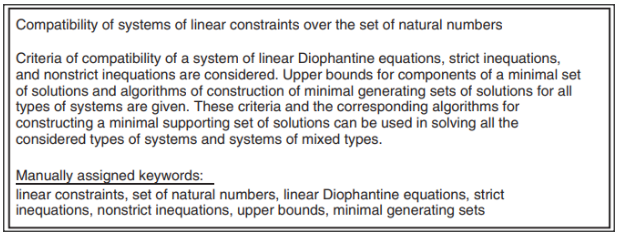
分詞成果見下，這些詞語就是 candidate keywords：(去掉停用詞等等)
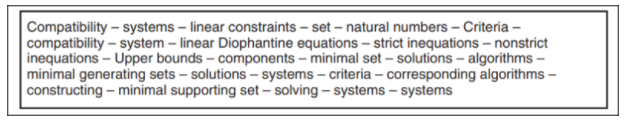
計算 word frequency。首先計算自身字頻。例如 algorithms 出現 2 次，bounds 出現 1 次，system 出現 1 次，systems 出現 4 次。

然後是計算 degree。先看 algorithms，除了自身出現 2 次，還有 1 次伴隨corresponding，所以 degree是 3。

degree 值最大的是 minimal，達到 8，因為是 minimal + set + minimal + generating + sets + minimal + supporting + set

所有字詞的 co-occurence 可以用表格表達：
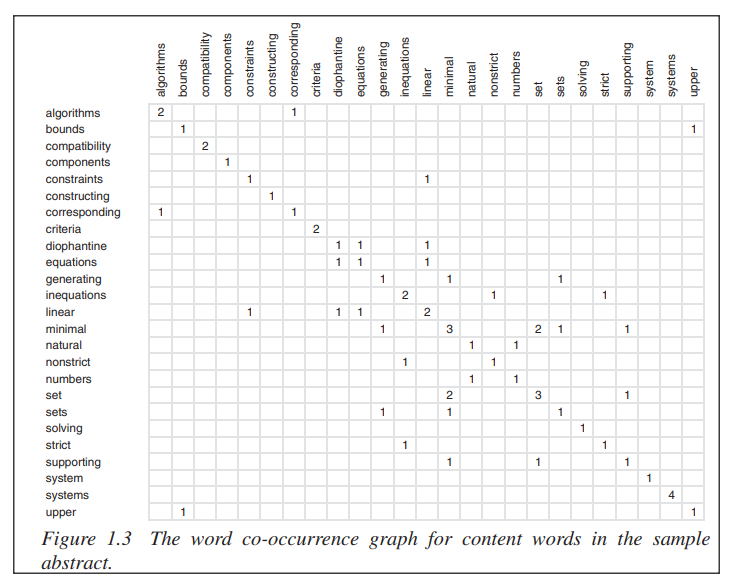
之後就可以計算 score，即每個字的 degree 除以 frequency。" score 愈大，該字愈為關鍵 "。那就是說，一個詞組愈長，degree 值愈大，即是 score 值愈大。

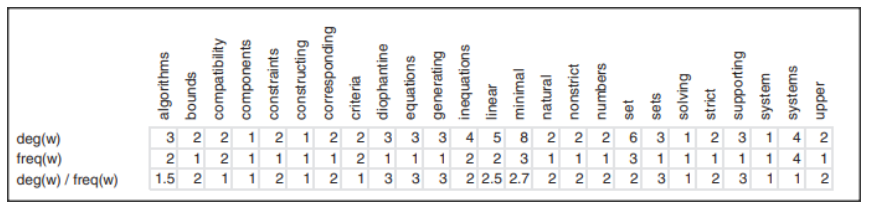

例如，algorithms 的 score 是 3 / 2 = 1.5，minimal 的 score 是 8 / 3 = 2.67。

以每個詞組計算，score 值最大的是 minimal generating sets，合共是 8.67。(2.67+3+3)

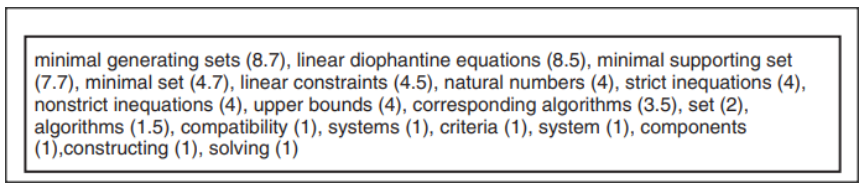





In [33]:
# Initialize empty column
df['plotwords'] = '' #'plotwords' 情節詞，在df中創立一個空的column。

# function to get keywords from a text
def get_keywords(x):
    plot = x
    
    # initialize Rake using english stopwords from NLTK, and all punctuation characters
    rake = Rake()
    
    # extract keywords from text
    rake.extract_keywords_from_text(plot) #使用rake裡面的extract_keywords_from_text方法(參數為傳進來的plot)
    
    # get dictionary with keywords and scores
    scores = rake.get_word_degrees()
    
    # return new keywords as list, ignoring scores
    return(list(scores.keys()))

# Apply function to generate keywords
df['plotwords'] = df['overview'].apply(get_keywords)  #df['overview'] 為大綱。

In [34]:
df['overview'] 

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [35]:
# 單做一行的樣子長這樣
# 為一dictionary的格式。
rake = Rake()
rake.extract_keywords_from_text(df['overview'][0])
scores = rake.get_word_degrees()

scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'22nd': 2,
             'century': 2,
             'paraplegic': 2,
             'marine': 2,
             'alien': 2,
             'civilization': 2,
             'protecting': 1,
             'moon': 2,
             'pandora': 2,
             'following': 2,
             'orders': 2,
             'unique': 2,
             'mission': 2,
             'dispatched': 1,
             'becomes': 2,
             'torn': 2})

In [36]:
df['plotwords'][0]

['22nd',
 'century',
 'paraplegic',
 'marine',
 'alien',
 'civilization',
 'protecting',
 'moon',
 'pandora',
 'following',
 'orders',
 'unique',
 'mission',
 'dispatched',
 'becomes',
 'torn']

In [37]:
# 這段程式碼需要注意，若我們上面沒有使用
#import warnings
#warnings.filterwarnings('ignore')
#這段程式碼，將會造成因為某些格自因為空格而出現not found的error messenge
#故我們使用 ignore method，使得不會因為空格而導致程式中斷。

df_keys = pd.DataFrame() 

df_keys['title'] = df['original_title']
df_keys['keywords'] = ''

def bag_words(x):
    return(' '.join(x['genres']) + ' ' + ' '.join(x['keywords']) + ' ' +  ' '.join(x['cast']) + 
           ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['plotwords']))
df_keys['keywords'] = df.apply(bag_words, axis = 1)

df_keys.head()

,title,keywords
0,Avatar,action adventure fantasy sciencefiction cultur...
1,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drugabuse exoti...
2,Spectre,action adventure crime spy basedonnovel secret...
3,The Dark Knight Rises,action crime drama thriller dccomics crimefigh...
4,John Carter,action adventure sciencefiction basedonnovel m...


In [38]:
# create count matrix
# 將文件中的詞語轉換為詞頻矩陣
cv = CountVectorizer()
# 統計每個單字出現的次數
cv_mx = cv.fit_transform(df_keys['keywords'])

In [39]:
# create cosine similarity matrix
cosine_sim = cosine_similarity(cv_mx, cv_mx) #X, Y座標
cosine_sim

array([[1.        , 0.10527936, 0.06299408, ..., 0.        , 0.        ,
        0.        ],
       [0.10527936, 1.        , 0.09284767, ..., 0.02438299, 0.        ,
        0.        ],
       [0.06299408, 0.09284767, 1.        , ..., 0.02188441, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02438299, 0.02188441, ..., 1.        , 0.05938557,
        0.03959038],
       [0.        , 0.        , 0.        , ..., 0.05938557, 1.        ,
        0.06818182],
       [0.        , 0.        , 0.        , ..., 0.03959038, 0.06818182,
        1.        ]])

推薦(Recommendation) 處理函數，輸入參數為電影名稱，輸出為前N名相似的電影

In [40]:
# create list of indices for later matching
indices = pd.Series(df_keys.index, index = df_keys['title'])

In [41]:
def recommend_movie(title, n = 10, cosine_sim = cosine_sim):
    movies = []
    
    # retrieve matching movie title index
    if title not in indices.index:
        print("Movie not in database.")
        return
    else:
        idx = indices[title]
    
    # cosine similarity scores of movies in descending order
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    
    # top n most similar movies indexes
    # use 1:n because 0 is the same movie entered
    top_n_idx = list(scores.iloc[1:n].index)
        
    return df_keys['title'].iloc[top_n_idx]

In [42]:
# 找出Toy Story這部電影的前5部最相似的電影
recommend_movie('Toy Story', n = 5)

343        Toy Story 2
42         Toy Story 3
837         Free Birds
221    Stuart Little 2
Name: title, dtype: object

In [43]:
# 找出The Avengers這部電影的前10部最相似的電影
recommend_movie('The Avengers') #不打個數就是預設10筆

7                  Avengers: Age of Ultron
174                    The Incredible Hulk
511                                  X-Men
85     Captain America: The Winter Soldier
79                              Iron Man 2
26              Captain America: Civil War
169     Captain America: The First Avenger
68                                Iron Man
31                              Iron Man 3
Name: title, dtype: object

In [44]:
recommend_movie('The Hobbit: An Unexpected Journey')

22                    The Hobbit: The Desolation of Smaug
19              The Hobbit: The Battle of the Five Armies
262     The Lord of the Rings: The Fellowship of the Ring
329         The Lord of the Rings: The Return of the King
330                 The Lord of the Rings: The Two Towers
292                                                Eragon
84                                               47 Ronin
1                Pirates of the Caribbean: At World's End
1044                   Journey to the Center of the Earth
Name: title, dtype: object

In [45]:
recommend_movie('Ocean\'s Eleven', n = 7)

398       Ocean's Thirteen
247         Ocean's Twelve
3425                    Go
4780           Dutch Kills
2060    Out of the Furnace
1674             Wild Card
Name: title, dtype: object